# Conceptual Highlight - Optimization is mathematical strategy to solve two types of problems:
## I. Problems that have many solutions (often infinite)
## II. Problems that have no solution 
------
# How do we solve these problems using optimization?
# Concept - Many Solutions: Reduce each possible solution to a single number. The lower the number the better the solution
# Concept - No Solutions: Reduce each error to a single number. The lower the number the better the error
# Define subdomain of feasible solutions i.e. constraints
--------
# Recap overdetermined and underdetermined solutions:
## Overdetermined (no solutions):
# $$\min_{\mathbf{x}} \|\mathbf{A}\mathbf{x} - \mathbf{b}\|_2$$
## For each $\mathbf{x}$ the scalar $\|\mathbf{A}\mathbf{x} - \mathbf{b}\|_2$ is computed
--------------
## Underdetermined (infinite solutions):
# $$
\min_{\mathbf{x}} \|\mathbf{x}\|_2^2\\
\textrm{s.t.}\\
\mathbf{A}\mathbf{x} = \mathbf{b}
$$
## For each $\mathbf{x}$ the scalar $\|\mathbf{x}\|_2^2$ is computed, and
## feasible solutions defined as those $\mathbf{x}$ that satisfy $\mathbf{A}\mathbf{x} = \mathbf{b}$
-----
# Two conceptual solution strategies so far
## 1. Direct minimization using scipy.optimize
## 2. Optimality criterion solving for roots of the gradient
-----
## Solution strategies: Recap 1D for Analogy Purposes

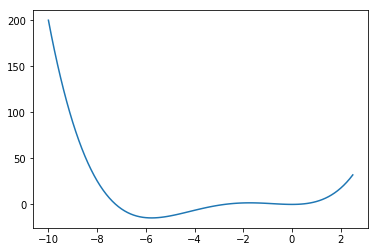

In [11]:
import scipy.optimize as opt
import numpy as np
import matplotlib.pyplot as plt

x = np.linspace(-10,2.5,101)
plt.plot(x, 2*x**2 + x**3 + 0.1*x**4)
plt.show()

## Minimize (scipy.optimize.minimize) and find derivatives that are zero (scipy.optimize.fsolve)
## Why is an initial guess required as we did not need it for the Linear Algebra? Optimization problems in general are non-linear.
## Important observation - final solution depends on method as well as the starting point

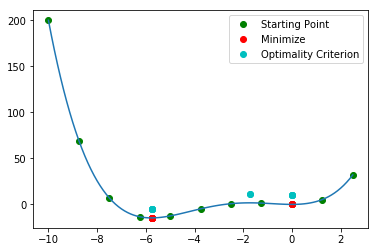

In [25]:
def Func1D(x):
    return 2*x**2 + x**3 + 0.1*x**4
def Der1D(x):
    return 4*x + 3*x**2 + 0.4*x**3
def Hes1D(x):
    return 4 + 6*x + 1.2*x**2

X0 = np.linspace(-10,2.5,11)
for x0 in X0:
    result = opt.minimize(Func1D,x0)
    plt.plot(x0,Func1D(x0),'go')
    plt.plot(result['x'],Func1D(result['x']),'ro')
    
    result = opt.fsolve(Der1D,x0)
    plt.plot(result[0],Func1D(result[0])+10,'co')
    
plt.legend(['Starting Point','Minimize','Optimality Criterion'])
x = np.linspace(-10,2.5,101)
plt.plot(x, 2*x**2 + x**3 + 0.1*x**4)
plt.show()

## Reminder: Finding derivative equal to zero is necessary but not sufficient - stationary point - three options (minimum, maximum or inflexion point)
## Sufficiency conditions: Derivative equal to zero + second derivative positive
------
# What are the equivalent conditions in multi-dimensions?
## Multi-dimensions the derivative is a gradient vector 
## $\nabla f(\mathbf{x}) = \left[\begin{eqnarray}\frac{\partial f}{\partial x_1}\\\frac{\partial f}{\partial x_2}\\
\vdots\\ \frac{\partial f}{\partial x_n} \end{eqnarray}\right]$
## and the second derivative is a Hessian matrix
## $H(\mathbf{x}) = 
\left[
\begin{eqnarray}
\frac{\partial^2 f}{\partial x_1^2},\frac{\partial^2 f}{\partial x_1x_2},\dots,\frac{\partial^2 f}{\partial x_1x_n}\\
\frac{\partial^2 f}{\partial x_2x_1},\frac{\partial^2 f}{\partial x_2^2},\dots,\frac{\partial^2 f}{\partial x_2x_n}\\
\vdots\\
\frac{\partial^2 f}{\partial x_nx_1},\frac{\partial^2 f}{\partial x_nx_2},\dots,\frac{\partial^2 f}{\partial x_n^2}\\
\end{eqnarray}\right]$
## Necessary condition: $\nabla f(\mathbf{x}) = \mathbf{0}$
## Sufficiency condition: Hessian matrix must be positive definite (minimum point)
## Recap: 
## Matrix is positive definite if all its eigenvalues are positive 
## Matrix is indefinite if some are positive and some negative
## Matrix is negative definite if all the eigenvalues are negative
## Concept:
## Gradient is zero + Hessian positive definite = minimum point
## Gradient is zero + Hessian indefinite = saddle point
## Gradient is zero + Hessian negative definite = maximum point

Optimality Criterion Solution [-0.81649658  0.75      ]
Optimality Criterion Solution [-0.81649658  0.75      ]
Optimality Criterion Solution [-0.81649658  0.75      ]
Optimality Criterion Solution [-0.81649658  0.75      ]
Minimization Solution [ 0.81649607  0.75000065]
Optimality Criterion Solution [-0.81649658  0.75      ]
Minimization Solution [ 0.8164972   0.74999904]
Optimality Criterion Solution [ 0.  0.]
Minimization Solution [ 0.81649694  0.74999884]
Optimality Criterion Solution [ 0.81649658  0.75      ]
Minimization Solution [ 0.8164965   0.75000006]
Optimality Criterion Solution [ 0.81649658  0.75      ]
Minimization Solution [ 0.8164966  0.75     ]
Optimality Criterion Solution [ 0.81649658  0.75      ]
Minimization Solution [ 0.81649664  0.75      ]
Optimality Criterion Solution [ 0.81649658  0.75      ]
Minimization Solution [ 0.81649651  0.75000019]
Optimality Criterion Solution [ 0.81649658  0.75      ]


/anaconda3/lib/python3.6/site-packages/scipy/optimize/minpack.py:161: RuntimeWarning: The iteration is not making good progress, as measured by the 
  improvement from the last ten iterations.
  warnings.warn(msg, RuntimeWarning)


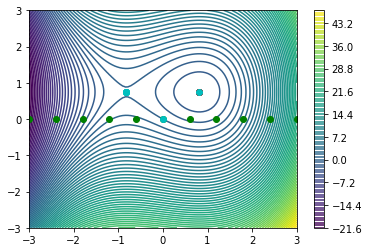

Todo
Classify each of the solution points in based on the Hessian


In [59]:
def Func1D(x):
    return (2*x[0] + 3*x[1] - x[0]**3 - 2*x[1]**2)*(-1)
def Der1D(x):
    return np.array([2-3*x[0]**2,3-4*x[1]])*(-1)
def Hes1D(x):
    return np.array([[-6*x[0],0],[0,-4]])*(-1)

X0 = np.linspace(-3,3,11)
for x0 in X0:
    # Function Minimization Approach
    plt.plot(x0,0,'go')
    result = opt.minimize(Func1D,[x0,0])
    if np.linalg.norm(result['x']) < 1E4:
        plt.plot(result['x'][0],result['x'][1],'ro')
        print('Minimization Solution {}'.format(result['x']))
    
    # Optimality Criterion Approach
    result = opt.fsolve(Der1D,[x0,0])
    if np.linalg.norm(result) < 1E4:
        plt.plot(result[0],result[1],'co')
        print('Optimality Criterion Solution {}'.format(result))
    
x = np.linspace(-3,3,101)
X,Y = np.meshgrid(x,x)
F = (2*X + 3*Y - X**3 - 2*Y**2)*(-1)
plt.figure(1);
plt.contour(X,Y,F,101);plt.colorbar()
plt.show()

print('Todo')
print('Classify each of the solution points in based on the Hessian')

------
# Lagrangian is the optimality criterion i.e. gradient of a function equals to zero equivalent when constraints are present e.g. $h(\mathbf{x}) = 0$
# Recap Calculus - the gradient vector is perpendicular to a level curve (or contour of constant function value)
# Insight Lagrange: see that the gradient of the function $\nabla f(\mathbf{x})$ is parallel to the gradient of the constraint $\nabla h(\mathbf{x})$ at the solution
# Mathematically this is written as:
# $$\nabla f(\mathbf{x}) = \lambda \nabla h(\mathbf{x})$$
# Lagrange therefore packaged this into a function of which we can take the gradient, namely the Lagrangian
# $$L(\mathbf{x},\lambda) = f(\mathbf{x}) + \lambda h(\mathbf{x})$$
# Note the additional variable $\lambda$ that is the unknown scale factor between the two gradients
# Simplified Karush-Kuhn-Tucker (KKT) Condition 
# $\nabla_x L(\mathbf{x},\lambda) = \nabla_x f(\mathbf{x}) + \lambda_x \nabla h(\mathbf{x}) = \mathbf{0}$
# $\nabla_\lambda L(\mathbf{x},\lambda) = h(\mathbf{x}) = 0$

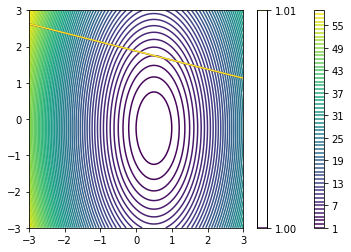

In [93]:
import sympy as sp
import numpy as np
import matplotlib.pyplot as plt

x = np.linspace(-3,3,101)
X,Y = np.meshgrid(x,x)
F = 4*(X-0.5)**2 + (Y+0.25)**2
G = (X-1.5) + 4*(Y-1.25)
plt.figure(1);
plt.contour(X,Y,F,60);plt.colorbar()
plt.contour(X,Y,G,[1,1.01]);plt.colorbar()
plt.show()

-----
# Simple but Typical Design Problem
# Compute the internal dimensions for a container that can hold 500 ml liquid that would minimize the cost!
## Lots of information missing - Typical of Design Problem
## Important to note that computing the actual production cost of a container is very complicated.
## Idea of a Proxy! Instead of computing the actual cost can we compute another quanitity that is close to the cost but much easier to compute?
## Concept of a Proxy is Crucial in Engineering Optimization - Requires you to really understand your problem very well
# Fair assumption - cost is dicated by material cost, hence surface area of container is a good indicator.
# Need to describe the geometry of the container i.e. parameterize the problem and choose the variables that can change between designs,  i.e. design variables, and choose the parameters that are fixed.
--------
# Let's consider three parameterizations:
# Rectangular box
# Cylinder
# Sphere
------
## Rectangular box
## What defines a rectangular container? Parametrise the geometry: width (w), height (h) and length (l)
## What is the surface area of the rectangular container 
## $$A(w,h,l) = 2(w\times h) + 2(l\times h) + 2(w\times l)$$
## Volume is given by $$V(w,h,l) = w \times h \times l$$
## 500 ml -> work in cm units then cm x cm x cm -> ml
-----
## Problem has three variables and one equality constraint
## We can choose to eliminate one variable from the equality constraint and end up with a two dimensional problem that is unconstrained
## Note two formulations for the same problem!

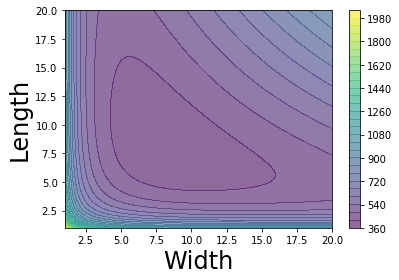

Minimum rectangular surface area 377.994421653 cm^2


In [94]:
%matplotlib inline
import matplotlib.pylab as plt
import matplotlib as mpl
import numpy as np

[W,L] = np.meshgrid(np.linspace(1,20,101),np.linspace(1,20,101))
H = 500./(W*L)
SURFACE_AREA_RECTANGULAR = (2*W*H+2*L*H+2*W*L)
plt.contourf(W,L,SURFACE_AREA_RECTANGULAR,31,alpha=0.6);plt.colorbar();
plt.xlabel('Width',fontsize=24)
plt.ylabel('Length',fontsize=24)
plt.show()

SURFACE_AREA_RECTANGULAR

print('Minimum rectangular surface area ' + str(np.min(np.min(SURFACE_AREA_RECTANGULAR))) + ' cm^2')

----------
# Cylinder
## What defines a cylindrical container? Parametrise the geometry: radius (r) and height (h)
## What is the surface area of the cylindrical container 
## $$A(r,h) = 2(\pi r^2) + (2\pi r \times h)$$
## Volume is given by $$V(r,h) = \pi r^2 h$$

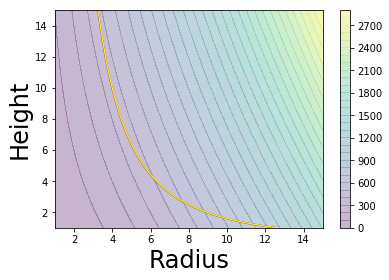

Rectangular surface area 349.470766785 cm^2


In [95]:
%matplotlib inline
import matplotlib.pylab as plt
import matplotlib as mpl
import numpy as np

[R,H] = np.meshgrid(np.linspace(1,15,101),np.linspace(1,15,101))
SURFACE_AREA_CYLINDER = 2*np.pi*R**2 + 2*np.pi*R*H
plt.contourf(R,H,SURFACE_AREA_CYLINDER,31,alpha=0.3);plt.colorbar()
VOLUME_CYLINDER = np.pi*R**2*H
plt.contour(R,H,VOLUME_CYLINDER,(499,501));
plt.xlabel('Radius',fontsize=24)
plt.ylabel('Height',fontsize=24)
plt.show()

ALMOST_FEASIBLE = (VOLUME_CYLINDER < 500.1)*(VOLUME_CYLINDER > 499.9)
print('Rectangular surface area ' + str(np.min(np.min(SURFACE_AREA_CYLINDER[ALMOST_FEASIBLE]))) + ' cm^2')

## How does the choices for a design change when we require 
## $$V(r,h) = 500$$ 
## or 
## $$V(r,h) \geq 500$$
----------
# Sphere
## Surface area for a spherical container 
## $$A(r) = 4\pi r^2$$
## Volume is given by $$V(r) = \frac{4}{3}\pi r^3 = 500$$

Spherical surface area 304.6473892689778 cm^2


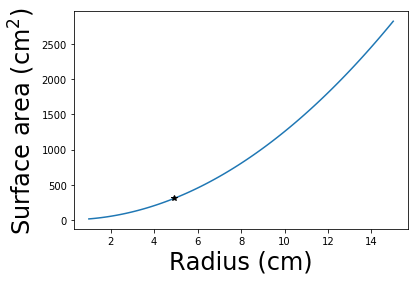

In [96]:
%matplotlib inline
import matplotlib.pylab as plt
import matplotlib as mpl
import numpy as np

R = np.linspace(1,15,101)
plt.plot(R,4*np.pi*R**2);
RV = (500*3./4/np.pi)**(1/3.)
plt.plot(RV,4*np.pi*RV**2,'k*');
plt.xlabel('Radius (cm)',fontsize=24)
plt.ylabel('Surface area (cm$^2$)',fontsize=24)

print('Spherical surface area ' + str(4*np.pi*RV**2) + ' cm^2')

# Some observations to consider:
## 1. Design variables dictates the dimensionality of the problem.
## 2. Design variables have to feature in the problem / affect the problem.
## 3. Equality constraints reduces the dimensionality of the optimization problem.
## 4. Inequality constraints reduces the number of solutions for the same dimensional problem.
## 5. Objective function - scalar function that allows us to quantify the quality of a design - quality criteria.
# A more complex analysis does not imply a better solution.
# **Appropriate models are essential and critical**
## All models are wrong but some are useful - George Box
## Since all models are wrong the scientist cannot obtain a "correct" one by excessive elaboration. On the contrary following William of Occam he should seek an economical description of natural phenomena. Just as the ability to devise simple but evocative models is the signature of the great scientist so overelaboration and overparameterization is often the mark of mediocrity. - Goerge Box
## George Box - Pioneer in the areas of quality control, time series analysis, design of experiments and Bayesian inference.
----------
# Typical Steps in Formulating an Optimization Problem given an initial problem
## 1. Data and Information Collection - Fill in the picture / look for proxies / consider design codes
## 2. Define the Design Variables
## 3. Define the Parameters
## 4. Define the optimization criterion
## 5. Formule the constraints
---------------------

# Formulate an optimization problem to fit a straight line $f(x) = ax+b$ through M data points?
## $$\begin{array}{rr} x & f(x) \\  2 & 1.5 \\ 3 & 3.4 \\ 4 & 4.8 \\ 5 & 5.3 \\ 6 & 6.5 \\ 7 & 6.7 \\ 8 & 7.4 \\9 & 19.1 \end{array}$$

Sum error squared at solution of sum error squared 63.531547619047785
Sum absolute values at solution of sum error squared 17.19523763396849
Maximum error at solution of sum error squared 6.0083335280528445
Sum error squared at solution of sum of absolute values 86.4318722452037
Sum absolute values at solution of sum ofabsolute values 12.899999999999999
Maximum error at solution of sum of absolute values 9.097280064556035
Sum error squared at solution of maximum error 132.85858914045397
Sum absolute values at solution of maximum error 28.970526325324375
Maximum error at solution of of maximum error 5.88906016155976


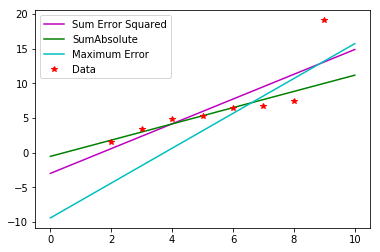

In [122]:
import matplotlib.pyplot as plt
import numpy as np
import scipy.optimize as opt

x = np.array([2,3,4,5,6,7,8,9])
f = np.array([1.5,3.4,4.8,5.3,6.5,6.7,7.4,19.1])

xline = np.linspace(0,10,2)

def line(z):
    return z[0]*x + z[1]

ErrorVector = lambda z: f - line(z)
SumErrorSquared = lambda z: np.dot(ErrorVector(z),ErrorVector(z))
SumAbsolute = lambda z: np.sum(np.abs((ErrorVector(z))))
MaxError = lambda z: np.max(np.abs((ErrorVector(z))))

for i in range(1):
    # Compute solution for the SumErrorSquared
    x0 = np.random.random(2)*np.array([30,50]) - np.array([15,25])
    solution = opt.minimize(SumErrorSquared,x0,method='bfgs')
    
    plt.plot(xline,solution['x'][0]*xline + solution['x'][1],'m-')
    print('Sum error squared at solution of sum error squared {}'.format(SumErrorSquared(solution['x'])))
    print('Sum absolute values at solution of sum error squared {}'.format(SumAbsolute(solution['x'])))
    print('Maximum error at solution of sum error squared {}'.format(MaxError(solution['x'])))

    # Compute solution for the SumAbsolute
    solution = opt.minimize(SumAbsolute,x0,method='bfgs')
    plt.plot(xline,solution['x'][0]*xline + solution['x'][1],'g-')
    print('Sum error squared at solution of sum of absolute values {}'.format(SumErrorSquared(solution['x'])))
    print('Sum absolute values at solution of sum ofabsolute values {}'.format(SumAbsolute(solution['x'])))
    print('Maximum error at solution of sum of absolute values {}'.format(MaxError(solution['x'])))

    # Compute solution for the MaxError
    solution = opt.minimize(MaxError,x0,method='bfgs')
    plt.plot(xline,solution['x'][0]*xline + solution['x'][1],'c-')
    print('Sum error squared at solution of maximum error {}'.format(SumErrorSquared(solution['x'])))
    print('Sum absolute values at solution of maximum error {}'.format(SumAbsolute(solution['x'])))
    print('Maximum error at solution of of maximum error {}'.format(MaxError(solution['x'])))
    
    plt.plot(x,f,'r*')
    
plt.legend(['Sum Error Squared','SumAbsolute','Maximum Error','Data'])


# Classification
# Consider Two Classes of Data
## One class labelled +1 and the other class labelled  -1
# Aim is to fit a straight line through the two

(-5.9636042366087363,
 5.2022453106735611,
 -5.3988929815453401,
 5.448904402689223)

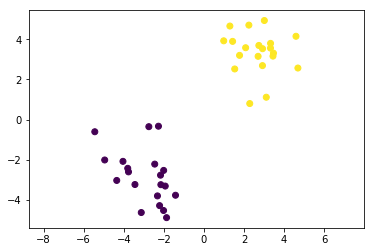

In [134]:
import numpy as np                
import matplotlib.pyplot as plt   

cluster_centre = 3 # Play with this to get two sets of data closer or further from each other
number_points = 20 # Number of points per class in the data set
TotalPoints = 2 * number_points # Total number of points in both classes

x_positive = np.random.normal(loc=cluster_centre, scale=1.0, size=[number_points, 2])#Points for + class     
x_negative = np.random.normal(loc=-cluster_centre, scale=1.0, size=[number_points, 2])#Points for - class
x = np.concatenate((x_positive, x_negative)) 
    
# The class (or "y") value is +1 or -1 for the two classes
y_positive = np.ones(number_points)    
y_negative = -np.ones(number_points)
y = np.concatenate((y_positive, y_negative))

fig = plt.figure()    
plt.scatter(x[:, 0], x[:, 1], c=y)
plt.axis('equal')

In [135]:
print('Fit a line through the two classes')
print('Devise a cost function and implement it - see if you can separate the two classes with a line')


Fit a line through the two classes
Devise a cost function and implement it - see if you can separate the two classes with a line


# Fit fifth order polynomial
# Lesson: Importance of variable scaling
# Scale x-domain from 100 to 10 to 1

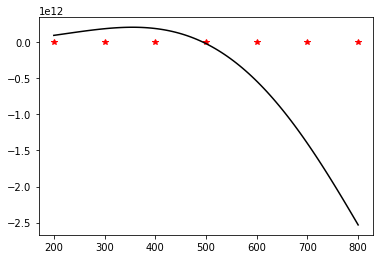

In [152]:
import matplotlib.pyplot as plt
import numpy as np

ScaleXDomain = 100
x = np.array([2,3,4,5,6,7,8])*ScaleXDomain
f = np.array([1.5,3.4,4.8,5.3,6.5,6.7,7.4])

xline = np.linspace(2,8,101)*ScaleXDomain

def line(z):
    return z[5]*x**5 + z[4]*x**4 + z[3]*x**3 + z[2]*x**2 + z[1]*x+z[0]

ErrorVector = lambda z: f - line(z)
SumErrorSquared = lambda z: np.dot(ErrorVector(z),ErrorVector(z))

import scipy.optimize as opt
solution = opt.minimize(SumErrorSquared,[1,1,1,1,1,1],method='bfgs')
plt.plot(x,f,'r*')
DESIGN = solution['x']
plt.plot(xline,DESIGN[5]*xline**5+DESIGN[4]*xline**4+DESIGN[3]*xline**3+DESIGN[2]*xline**2+DESIGN[1]*xline**1+DESIGN[0],'k-')

# Can you explain why the fits look so different?
# Hint: Compute the x**5 for the larger x-values.

In [ ]:
print